In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

d:\measuring\data
reloaded
d:\measuring\data


SSRO calibration :  20160712/175035
max. F = (96.17 +/- 0.38)% at t=14 us
	ms_0 = (94.08 +/- 0.33)%
	ms_1 = (98.26 +/- 0.18)%


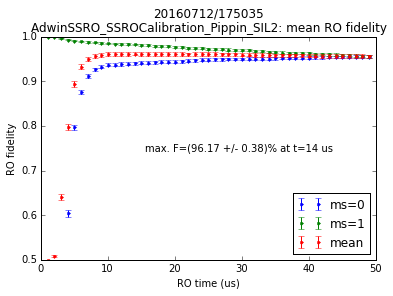

In [11]:
reload(ssro)
ssro.ssrocalib(plot_photon_ms0=False) #folder = 'D:\measuring\data\20160126\180407_AdwinSSRO_SSROCalibration_Pippin_SIL1')
# print 'Threshold is 96.6'

ms0 0
msp1 1
msm1 -1
SSRO calibration :  20160711/124533
max. Fm = (92.95 +/- 0.51)% at t=7 us
	ms_0 = (92.30 +/- 0.38)%
	ms_1 = (93.60 +/- 0.35)%
max. Fp = (96.93 +/- 0.34)% at t=37 us
	ms_0 = (95.22 +/- 0.30)%
	ms_1 = (98.64 +/- 0.16)%
Job's done!


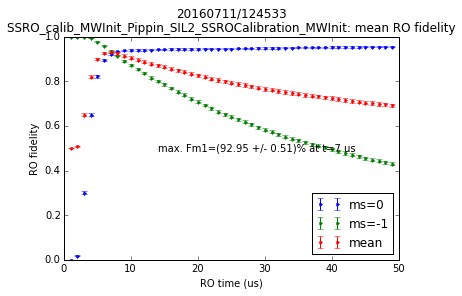

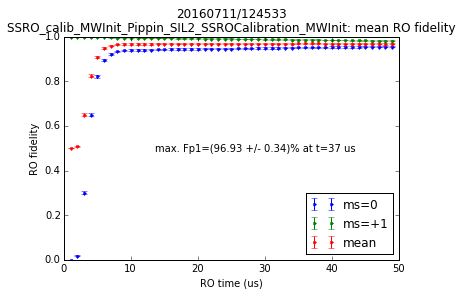

In [10]:
reload(ssro)
ssro.ssrocalib_MWInit(plot_photon_ms0=False)

# DARKESR

d:\measuring\data\20160703\094325_PulsarDarkESR_Pippin_SIL3
Converged with chi squared  0.0943836683237
degrees of freedom, dof  146
RMS of residuals (i.e. sqrt(chisq/dof))  0.0254256461406
Reduced chisq (i.e. variance of residuals)  0.000646463481669

fitted parameters at minimum, with 68% C.I.:
 0 a              0.997616 +/-   0.003030
 1 A              0.120735 +/-   0.010864
 2 sigma          0.000199 +/-   0.000014
 3 x0             4.049680 +/-   0.000028
 4 s1             0.002194 +/-   0.000011

correlation matrix:
               a         A         sigma     x0        s1        
         a  1.000000
         A  0.486838  1.000000
     sigma  0.275886 -0.438796  1.000000
        x0  0.409936  0.775791 -0.287215  1.000000
        s1  0.000017  0.000577 -0.000689  0.000042  1.000000



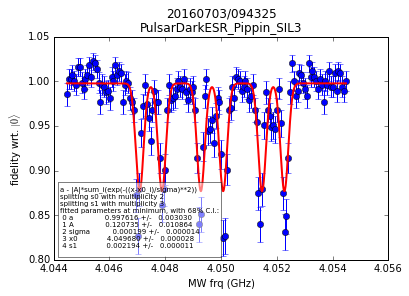

In [35]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis_purification.py')

# Pi pulses

d:\measuring\data\20160711\120055_Pi_Calibration_Pippin_SIL2Pi
[ 0.08        0.03833333  0.01666667  0.01166667  0.005       0.          0.01
  0.01333333  0.015       0.02333333  0.045       0.06833333]
min x =  0.700818181818
min y = -0.0159861741197
[ 0.08        0.03833333  0.01666667  0.01166667  0.005       0.          0.01
  0.01333333  0.015       0.02333333  0.045       0.06833333]
min x =  0.700818181818
min y = -0.0159861741197
fitted infidelity -0.0153445592744
Fitted minimum at  0.71814645712


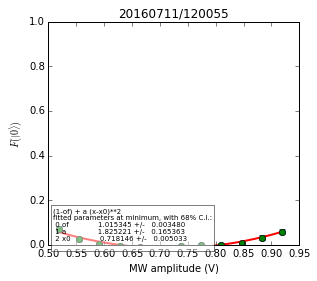

In [8]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Calibration')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.67,a_guess=0,of_guess=0, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(0,1.)
print 'fitted infidelity', 1-fit['params'][0]
print 'Fitted minimum at ', fit['params'][2]

# Pi/2

[ 0.34   0.364  0.388  0.412  0.436  0.46   0.484  0.508  0.532  0.556
  0.58 ]
Converged with chi squared  0.00942002265375
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0323522670573
Reduced chisq (i.e. variance of residuals)  0.00104666918375

fitted parameters at minimum, with 68% C.I.:
 0 m             -2.878346 +/-   0.128528
 1 x0             0.481868 +/-   0.003527

correlation matrix:
               m         x0        
         m  1.000000
        x0  0.276870  1.000000



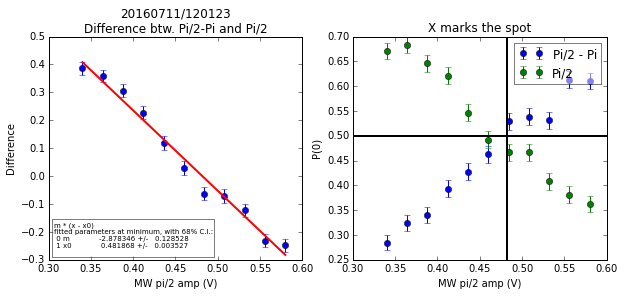

In [9]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

#Electron T1

Converged with chi squared  0.0243315281678
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.0450291832851
Reduced chisq (i.e. variance of residuals)  0.00202762734732

fitted parameters at minimum, with 68% C.I.:
 0 A              0.674798 +/-   0.028309
 1 tau        88217.373739 +/- 8061.600350

correlation matrix:
               A         tau       
         A  1.000000
       tau -0.745519  1.000000

minimal point: 69261.5384615


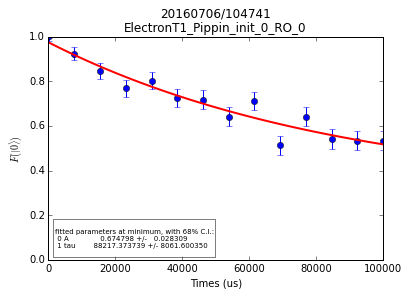

In [27]:
### no RO correction
from analysis.lib.fitting import fit
folder= tb.latest_data('ElectronT1')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0,1.0)
y = a.p0
p0,fitfunc,fitfunc_str = common.fit_exp_decay_with_offset(0.3,0.7,50e3)
fit_result = fit.fit1d(a.sweep_pts,y,None,p0=p0,fitfunc=fitfunc,do_print=True,fixed=[0],ret=True)
plot.plot_fit1d(fit_result,np.linspace(a.sweep_pts[0],a.sweep_pts[-1],100),ax=ax,plot_data=False)
print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

# PM Sweep

[ 0.928  0.927  0.908  0.901  0.917  0.916  0.752  0.495  0.365  0.139
  0.089  0.077  0.058  0.059  0.059  0.07   0.056  0.064  0.064  0.054]
min x =  40.0
min y = 0.0421007867319


(0, 1.0)

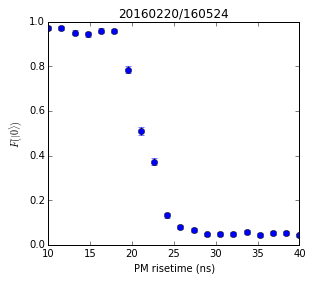

In [9]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('PMrisetime')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
#fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(0,1.)